# Homework 2

### Due by 11:59pm on 1 November ( submit within Portfolio )

For each instruction, show your code and execution within the Jupyter Notebook.

In [ ]:
#Instruction1: import library and settings

In [198]:
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl


from cycler import cycler
#Need to go to terminal and conda install -c conda-forge palettable
from palettable.colorbrewer.qualitative import Dark2_7


dark2_cmap = Dark2_7
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.prop_cycle'] = cycler('color',dark2_colors)
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

#Instruction2: Describe your data set (see hint below):

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


In [199]:
#Instruction3: Import your dataset and print then number of rows and columns
import pandas as pd
df=pd.read_csv("data/HW2/wdbc.csv")
print("The number of columns is: " + str(len(df.columns)))
print("The number of rows is: " + str(len(df.index)))

The number of columns is: 12
The number of rows is: 569


In [121]:
#Instruction4: Print the names of the features/attributes of your dataset and show the head of the dataset
df.dtypes

ID_Number               int64
Diagnosis              object
Radius                float64
Texture               float64
Perimeter             float64
Area                  float64
Smoothness            float64
Compactness           float64
Concavity             float64
Comcave_Points        float64
Symetry               float64
Fractal_dimensions    float64
dtype: object

In [76]:
df.head()

,ID_Number,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Comcave_Points,Symetry,Fractal_dimensions
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1af1e9e8>,
      dtype=object)

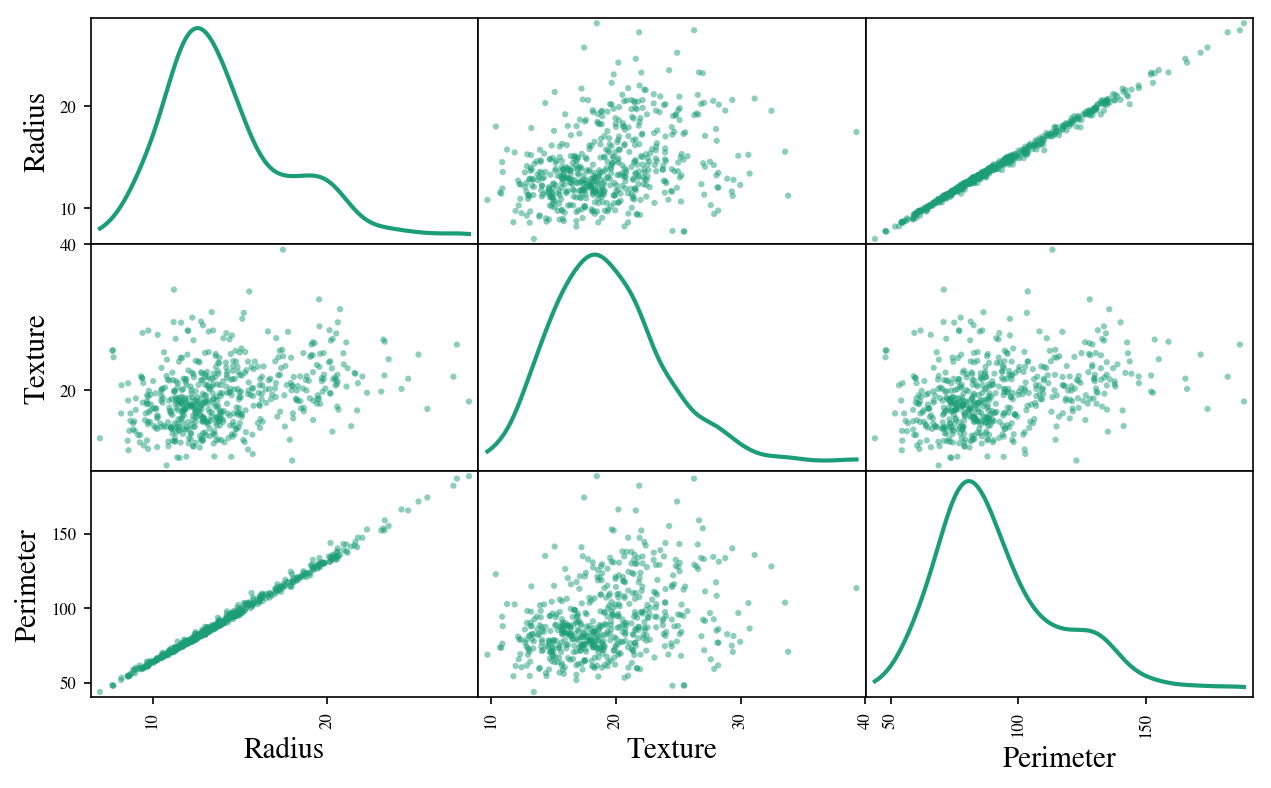

In [200]:
#Instruction5: Use a SPLOM to visualize some columns of this dataset. In Panda's the SPLOM is a one-liner.
from pandas.plotting import scatter_matrix
data = df[['Radius','Texture','Perimeter']]
scatter_matrix(data,diagonal = 'kde')

In [201]:
#Instruction6: Are there any strong correlation between any of the features.  Run a correlation analysis on the three 
#features.
data.corr(method = 'pearson')


,Radius,Texture,Perimeter
Radius,1.000000,0.323782,0.997855
Texture,0.323782,1.000000,0.329533
Perimeter,0.997855,0.329533,1.000000


In [202]:
#Instruction7: Carry out the regression, first standardizing our variables. This is strictly not necessary, but we are doing it as we wish to play around with PCA. 
#Since scikit-learn wants a n_sample rows times n_features matrix, we need to reshape the x variable. We store both an _vec variable, which is easier to plot with, 
#as well as the reshaped variable. 
from sklearn.linear_model import LinearRegression

X_HD = data[['Radius', 'Texture']].values
X_HDn = (X_HD - X_HD.mean(axis=0))/X_HD.std(axis=0)
radius_std_vec = X_HDn[:,0]
radius_std = radius_std_vec.reshape(-1,1)
texture_std_vec = X_HDn[:,1]
texture_std = texture_std_vec.reshape(-1,1)


In [203]:
#Instruction8: Split the data into a training set and a testing set. By default, 25% of the data is reserved for 
#testing. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(radius_std, texture_std_vec)


In [204]:
#Instrusction9: Use the training set for the fit, and find what our predictions ought to be on both the training and 
#test set.
clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
trains = X_train.reshape(1,-1).flatten()
tests = X_test.reshape(1,-1).flatten()
print (clf1.coef_, clf1.intercept_)


[0.34814498] 0.016359812573858566


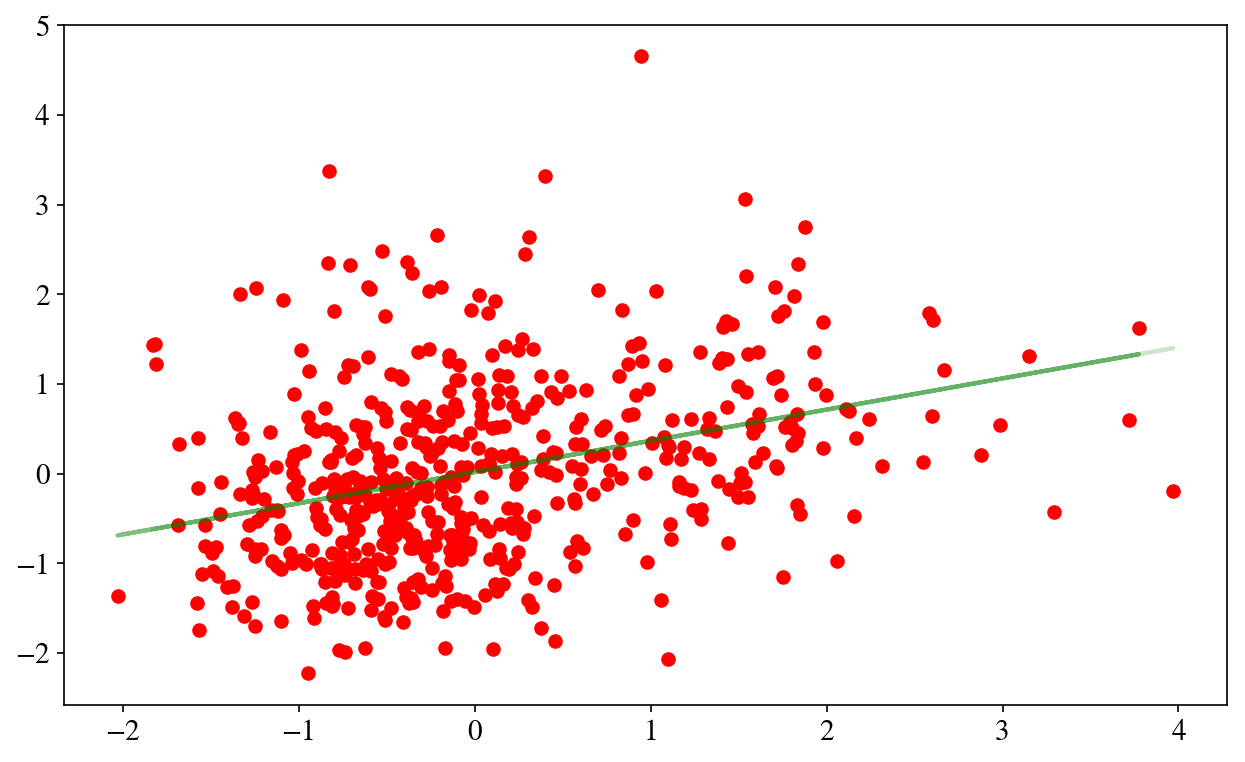

In [205]:
#Instruction10: Plot the scatter against the fit for both training and test data.
plt.scatter(radius_std_vec, texture_std_vec,c='r')
plt.plot(trains, predicted_train, c='g', alpha=0.5)
plt.plot(tests, predicted_test, c='g', alpha=0.2)


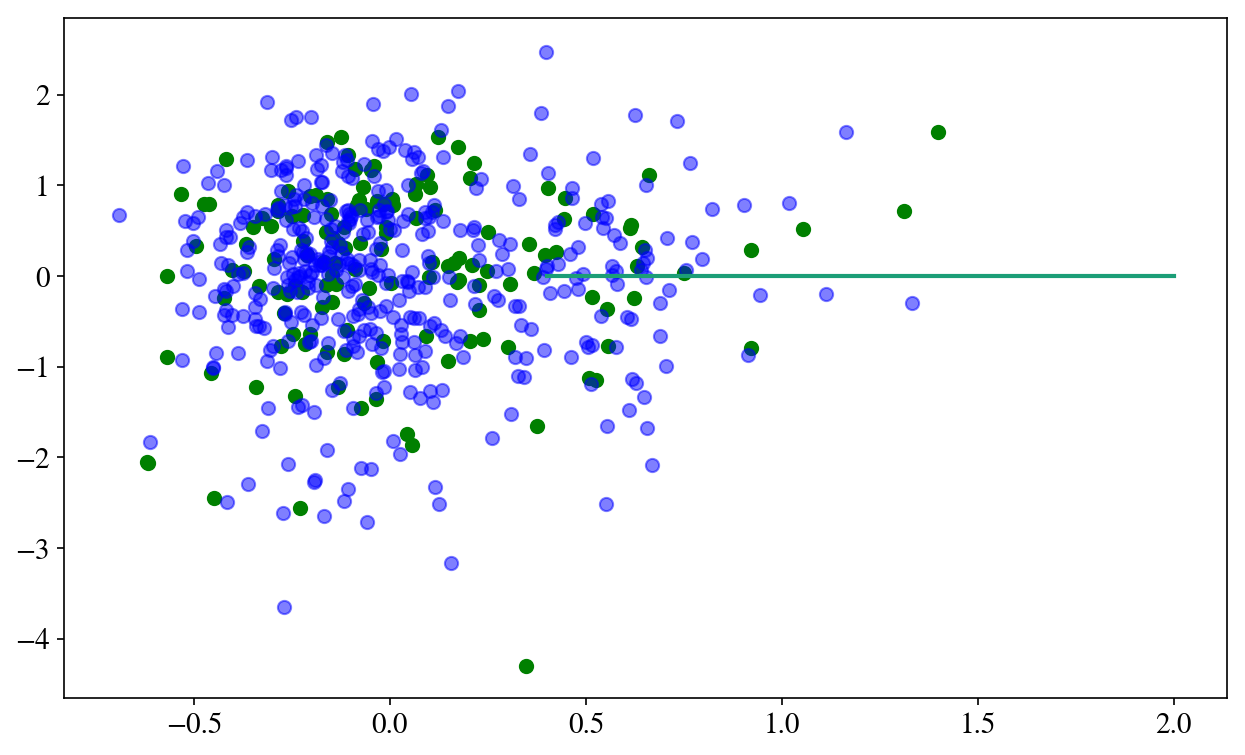

In [206]:
#Instruction11: Look at the residuals, again on both sets.
plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40)
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5)
plt.plot([0.4,2],[0,0])


In [207]:
#Instruction12: Take the standarddized data and do a 2-D PCA on it. 
#Here we do not seek to accomplish a dimensional reduction, but to understand the variance structure of the data.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_HDn)
print (pca.explained_variance_ratio_)


[0.66189095 0.33810905]


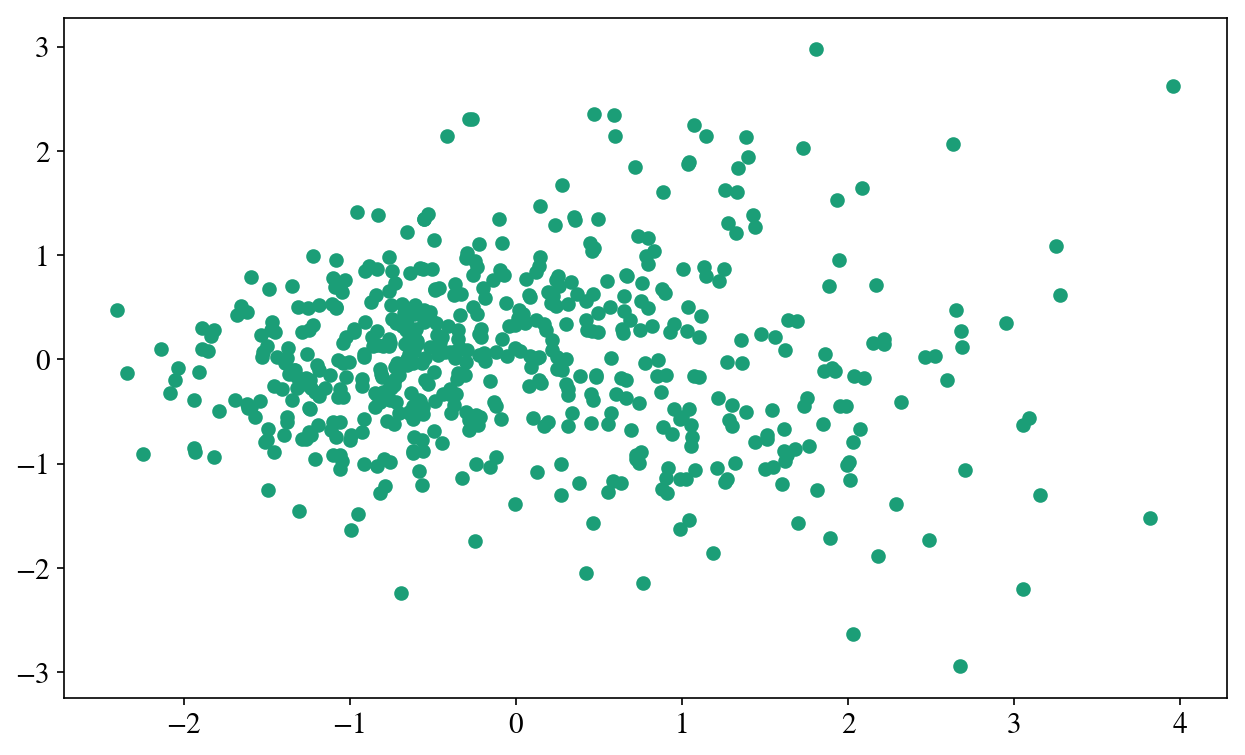

In [208]:
plt.scatter(X[:, 0], X[:, 1])

In [209]:
#Instruction13: Reconstruct the original data from only the first component, setting the others to 0.
pca1 = PCA(n_components=1) 
X_E = pca1.fit_transform(X_HDn)
X_reconstructed = pca1.inverse_transform(X_E)


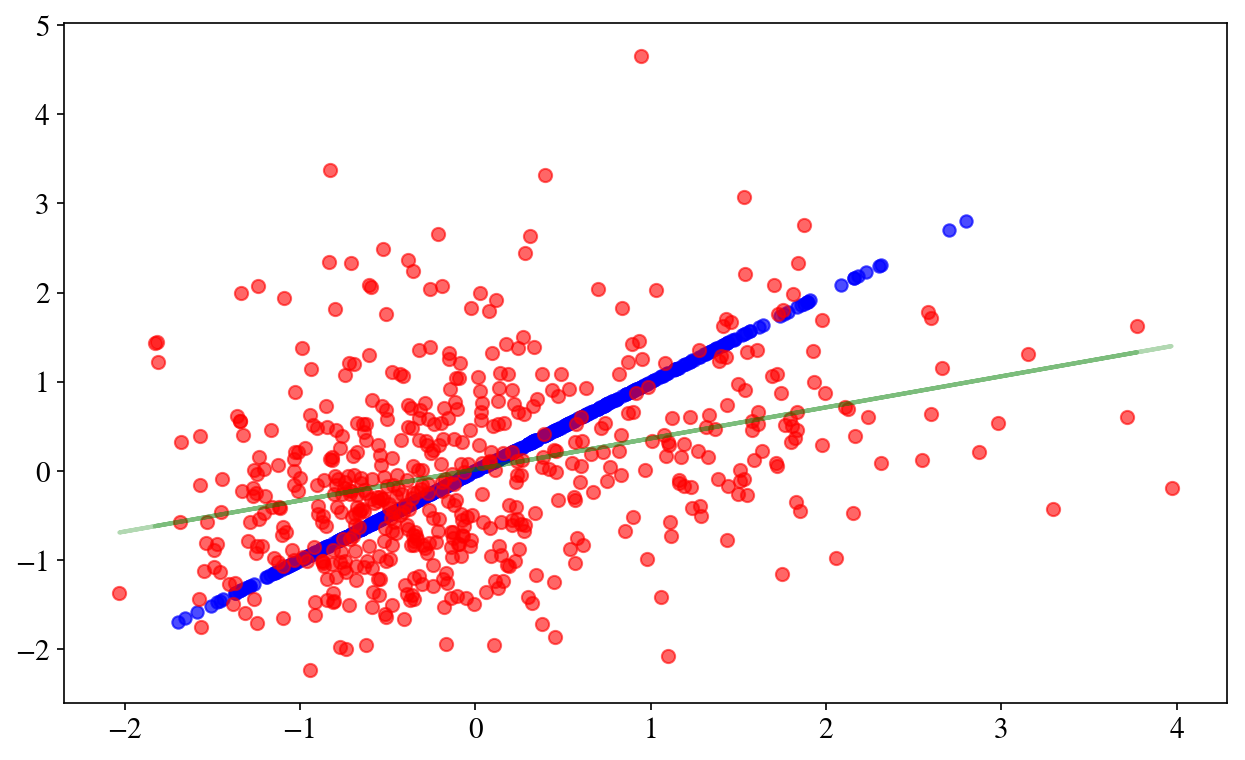

In [210]:
#Instruction14: Plot the reconstructed education(x) and income(y) from the first principal component, in blue.
plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1],c='b', s=35, alpha=0.7)
plt.scatter(radius_std_vec, texture_std_vec, s=40, c='r', alpha=0.6)
plt.plot(trains, predicted_train, c='g', alpha=0.3)
plt.plot(tests, predicted_test, c='g', alpha=0.3)


In [ ]:
#Part2: Logistic Regression Instuctions

In [211]:
#Instruction1: Load the array
data=np.array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

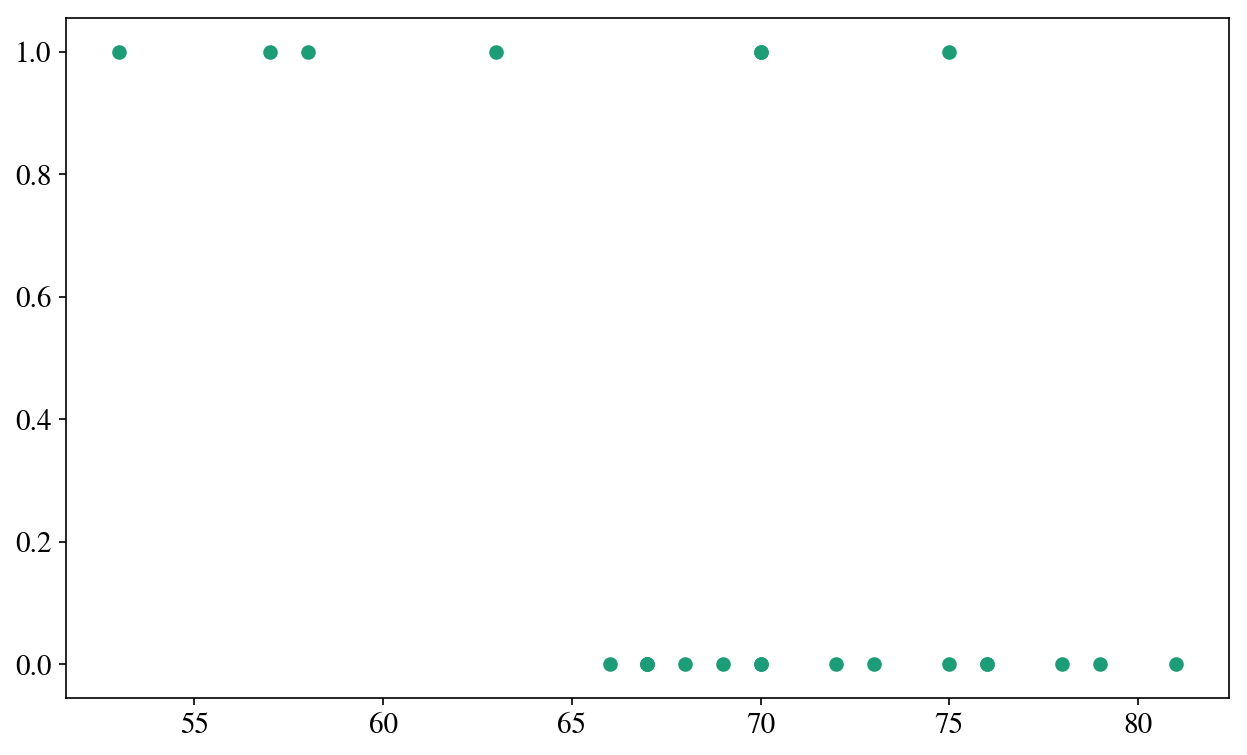

In [212]:
#Instruction2: Plot the array.
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()


In [213]:
#Instruction3: Run Logistic Regression with sklearn.linear_model and set c to 1000.
from sklearn.linear_model import LogisticRegression
reg=1000.
clf2 = LogisticRegression(C=reg)
clf2.fit(temps.reshape(-1,1), pfail)



LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [214]:
#Instruction4: Make predictions, get the associated probabilities, and plot them.
tempsnew=np.linspace(20., 90., 15)
probs = clf2.predict_proba(tempsnew.reshape(-1,1))[:, 1]
predicts = clf2.predict(tempsnew.reshape(-1,1))

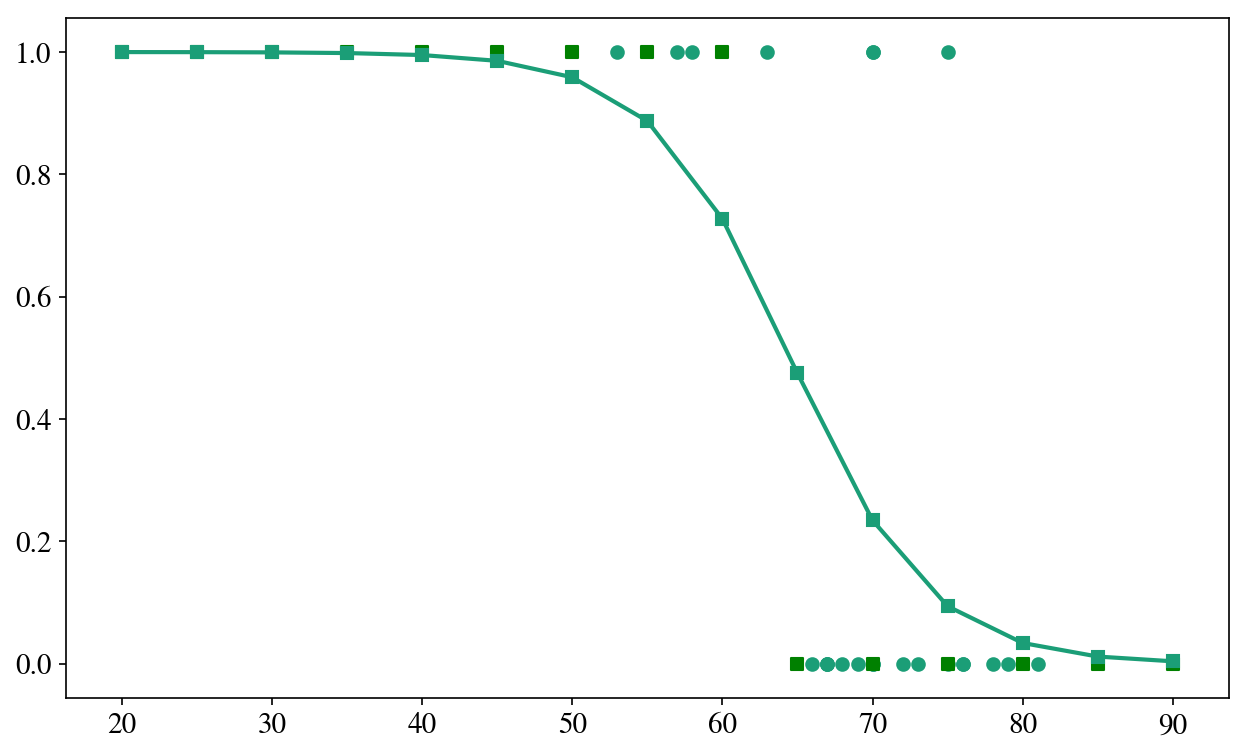

In [215]:
plt.scatter(temps, pfail)
plt.plot(tempsnew, probs, marker='s')
plt.scatter(tempsnew, predicts, marker='s', color="green")

In [216]:
#Instruction5: use pandas crosstab to write a table of prediction vs failure on the "training" set.
pd.crosstab(pfail, clf2.predict(temps.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])


Predicted,0.0,1.0
Actual,,
0.0,16,0
1.0,3,4


In [ ]:
#Part3: Bias and Variance and Cross Validation


In [217]:
# Instruction1: Load the settings needed for part3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

import matplotlib.cm as cm
import matplotlib as mpl
from cycler import cycler
from palettable.colorbrewer.qualitative import Dark2_7


dark2_cmap = Dark2_7
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.prop_cycle'] = cycler('color',dark2_colors)
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

In [171]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [218]:
#Instruction2: Load your dataset

import pandas as pd
df=pd.read_csv("data/HW2/wdbc.csv")
print(len(df.columns))
print(len(df.index))

12
569


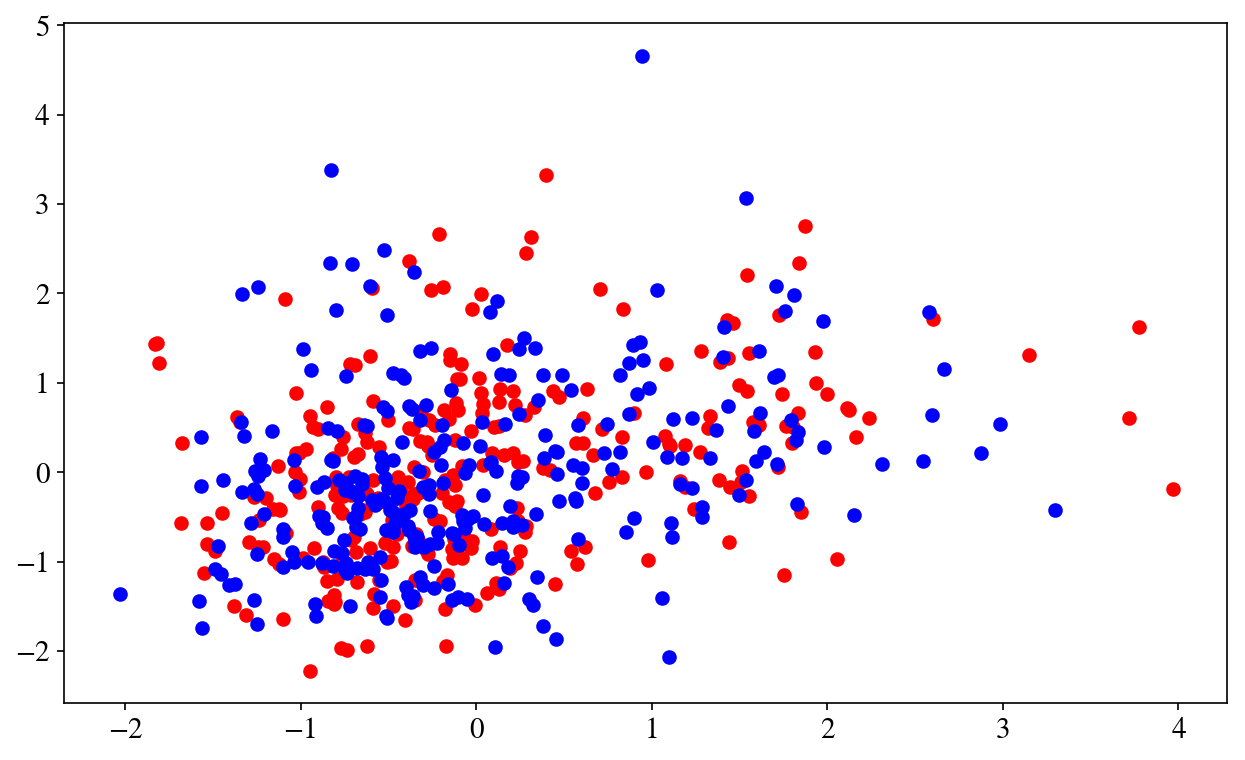

In [219]:
#Instruction3: Split the data set into equal parts test and training using the std vectors from Part1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(radius_std, texture_std_vec, test_size=0.5)
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, y_test, color='blue')




In [220]:
#Instruction4: Create a column called "class" and randomly add a "1", "2", or "3" for every row.
#e.g.
#featueA | Class
#--- | ---
#9 | 1
#5 | 2
#7 | 3
#6 | 2
#3 | 1
#6 | 3

df['randNumCol'] = np.random.randint(1, 4, df.shape[0])
print(df.columns)

Index(['ID_Number', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Comcave_Points', 'Symetry', 'Fractal_dimensions', 'randNumCol'], dtype='object')


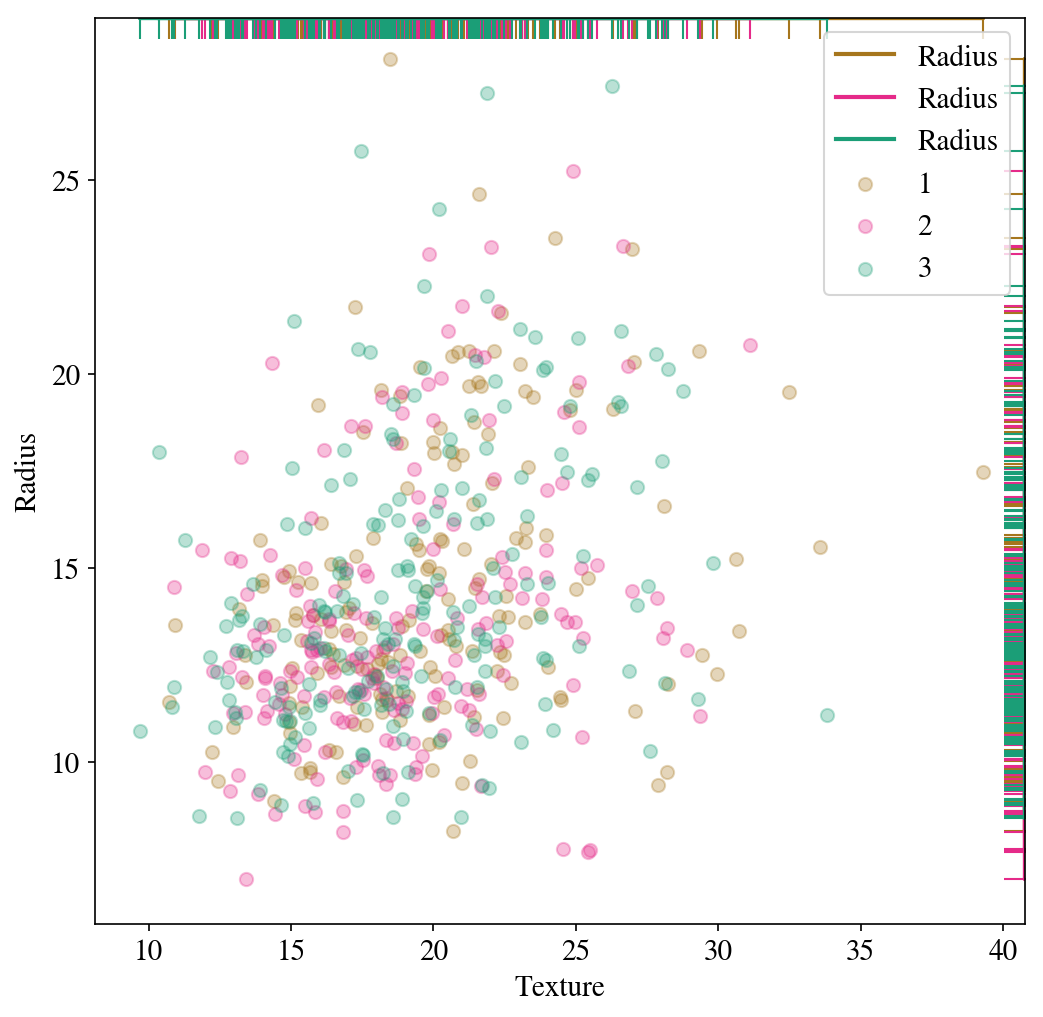

In [221]:
#Instruction5: Choose three different features in your dataset and cluster them by the randomNumCol

dkeys=[1,2,3]
dvals=[1,2,3]
dmap={e[0]:e[1] for e in zip(dkeys,dvals)}
ax=scatter_by(df, 'Texture', 'Radius', by='randNumCol', labeler=dmap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');



In [227]:
#Instructin6: Add plotting settings
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE", clf.score(Xte, yte))
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return ax

In [228]:
#Instruction7: Develop a kNN with 20 neighbors
from sklearn.neighbors import KNeighborsClassifier
subdf=df[['Texture','Radius']]
subdfstd=(subdf - subdf.mean())/subdf.std()
X=subdfstd.values
y=df['randNumCol'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5)
Xtr=np.concatenate((Xtrain, Xtest))

clf3 = KNeighborsClassifier(20).fit(Xtrain, ytrain)


SCORE 0.30526315789473685


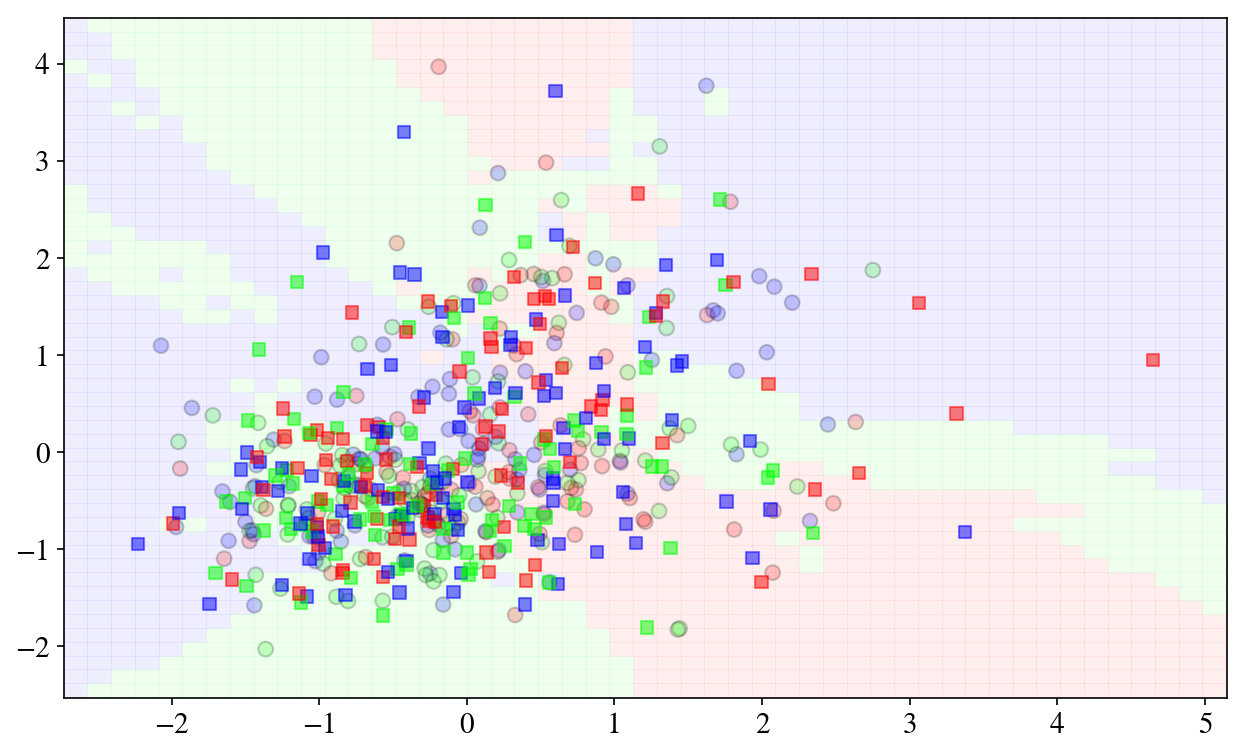

In [229]:
#Instruction8: Plot the kNN model with 20 neighbors
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf3)


SCORE 0.3719298245614035


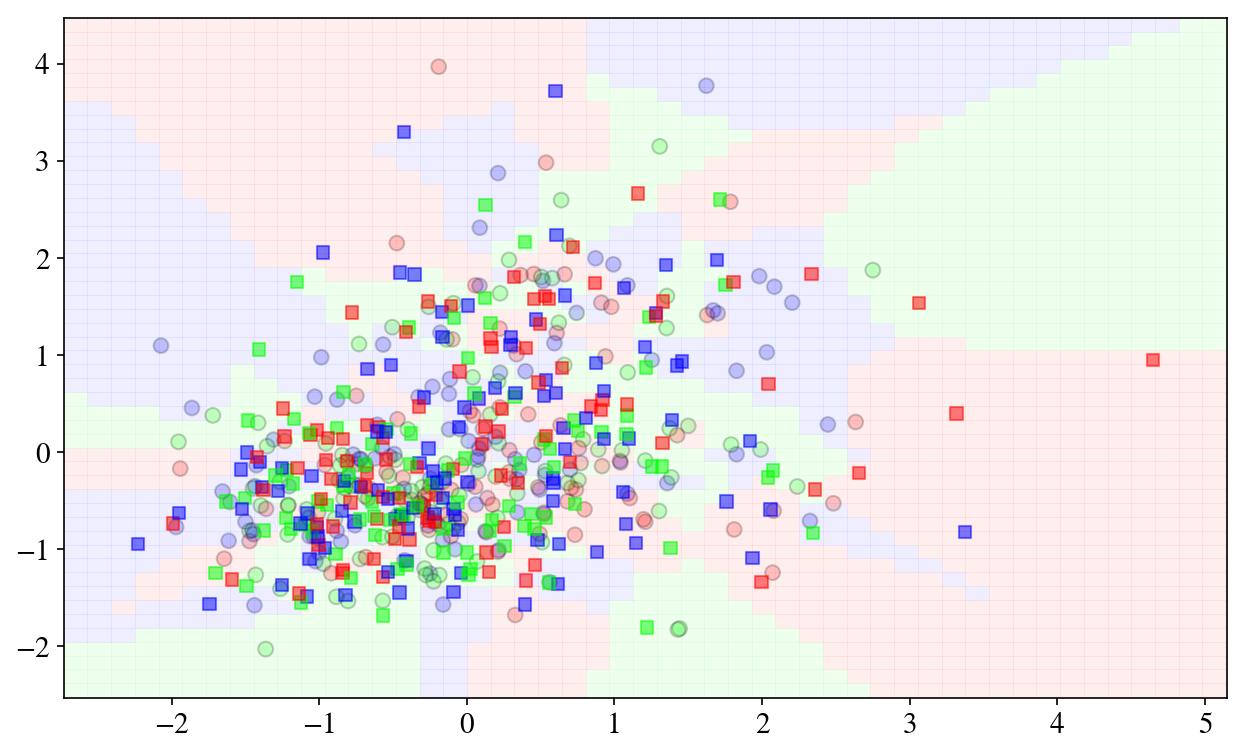

In [230]:
##Instruction9: Plot the kNN model with 1 neighbors
clf4 = KNeighborsClassifier(1).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf4)


SCORE 0.2982456140350877


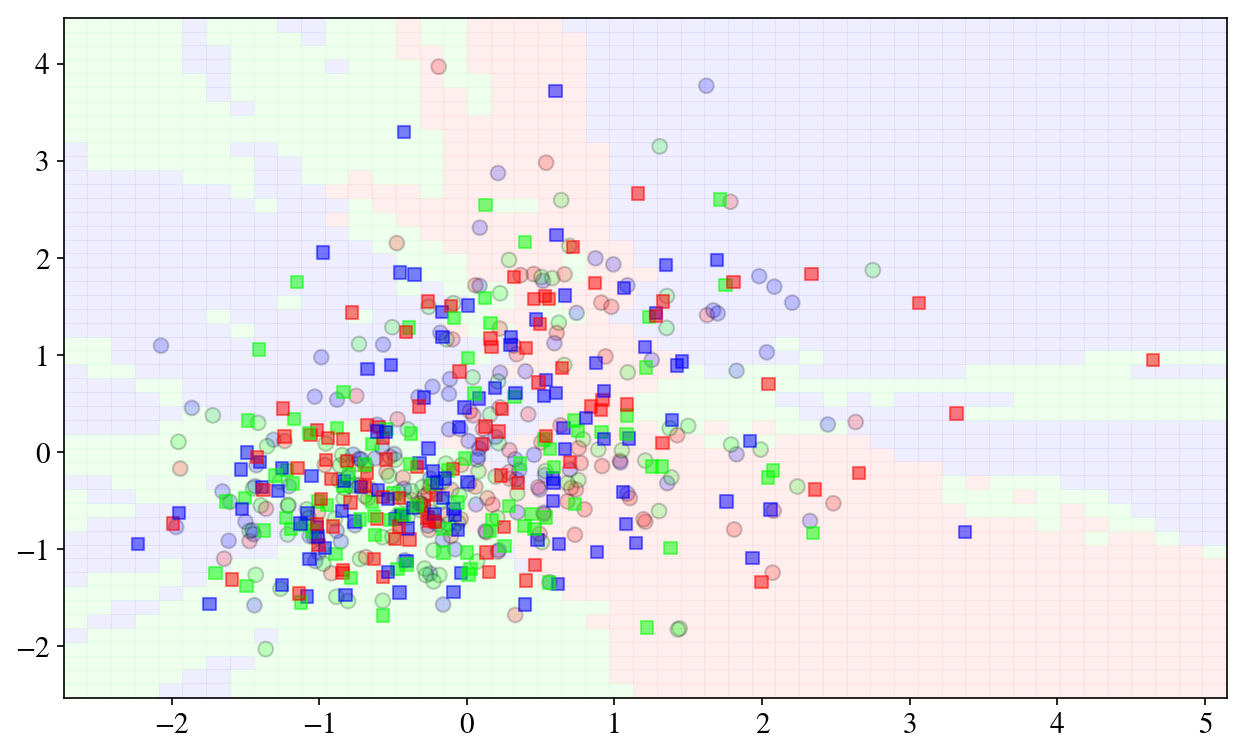

In [231]:
##Instruction10: Plot the kNN model with 35 neighbors
clf5 = KNeighborsClassifier(35).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf5)

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.3986013986013986
{'n_neighbors': 19} 0.4295774647887324
             precision    recall  f1-score   support

          1       0.26      0.21      0.23        91
          2       0.32      0.49      0.39        91
          3       0.30      0.21      0.25       103

avg / total       0.30      0.30      0.29       285



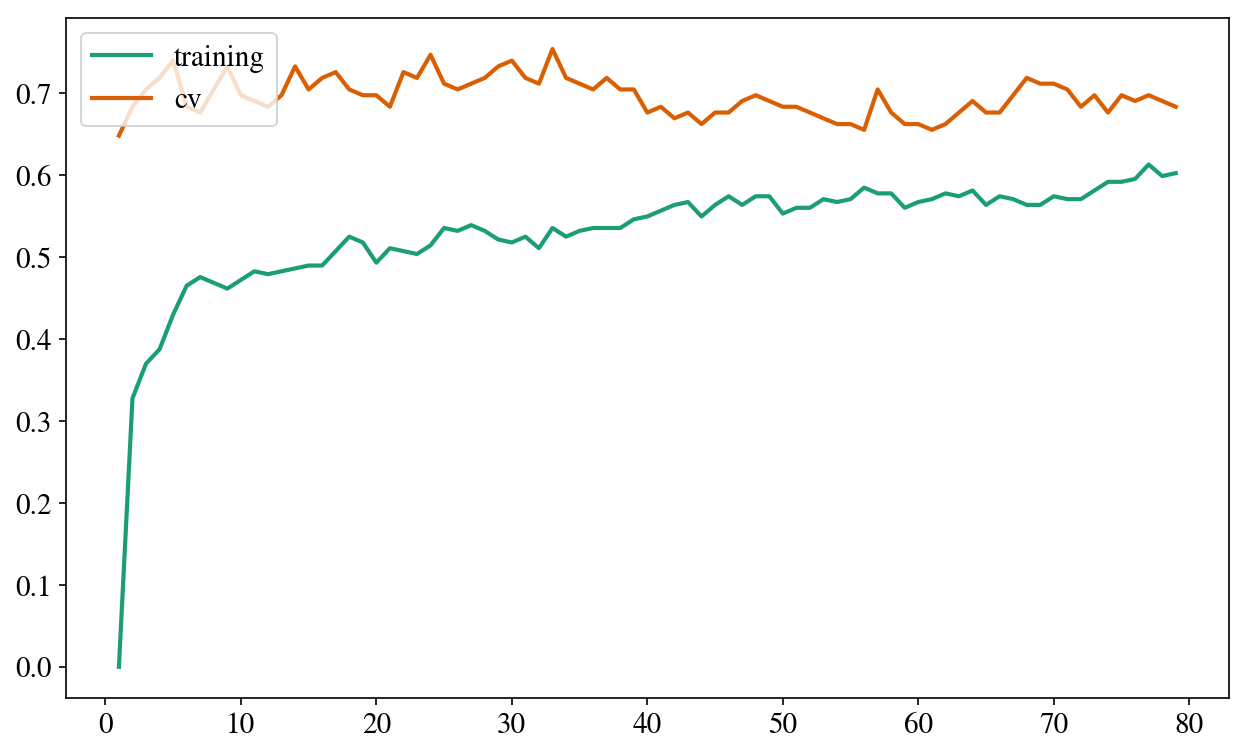

In [237]:
#Instruction 11:
# a) Develop a function to run KNN with a k from 1-80.  Split the data set into test and training and then
# plot the accuracies of the training set vs. the test set for all 80 test runs.
# b) Use "from sklearn.grid_search import GridSearchCV"  and "from sklearn.metrics import classification_report
#  to print the precision, recall, f1-score, and support
# c) Creat a plot using the GridSearchCV values. 

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

Xcv,Xte,ycv,yte=train_test_split(Xtest, ytest, train_size=0.5)
trscores=[]
cvscores=[]
ns=np.arange(1,80,1)
ones=np.ones(len(ns))
for n in ns:
    clf = KNeighborsClassifier(n).fit(Xtrain, ytrain)
    trscores.append(clf.score(Xtrain, ytrain))
    cvscores.append(clf.score(Xcv, ycv))
plt.plot(ns, ones-trscores, label="training")
plt.plot(ns, ones-cvscores, label="cv")
plt.legend(loc='upper left');
print (clf.score(Xte, yte))


parameters = {"n_neighbors": np.arange(1,80,1)}
clf = KNeighborsClassifier()
gs = GridSearchCV(clf, param_grid=parameters, cv=10)
gs.fit(Xtrain, ytrain)
#print gs.grid_scores_
print (gs.best_params_, gs.best_score_)
y_true, y_pred = ytest, gs.predict(Xtest)
print(classification_report(y_true, y_pred))


SCORE 0.3017543859649123


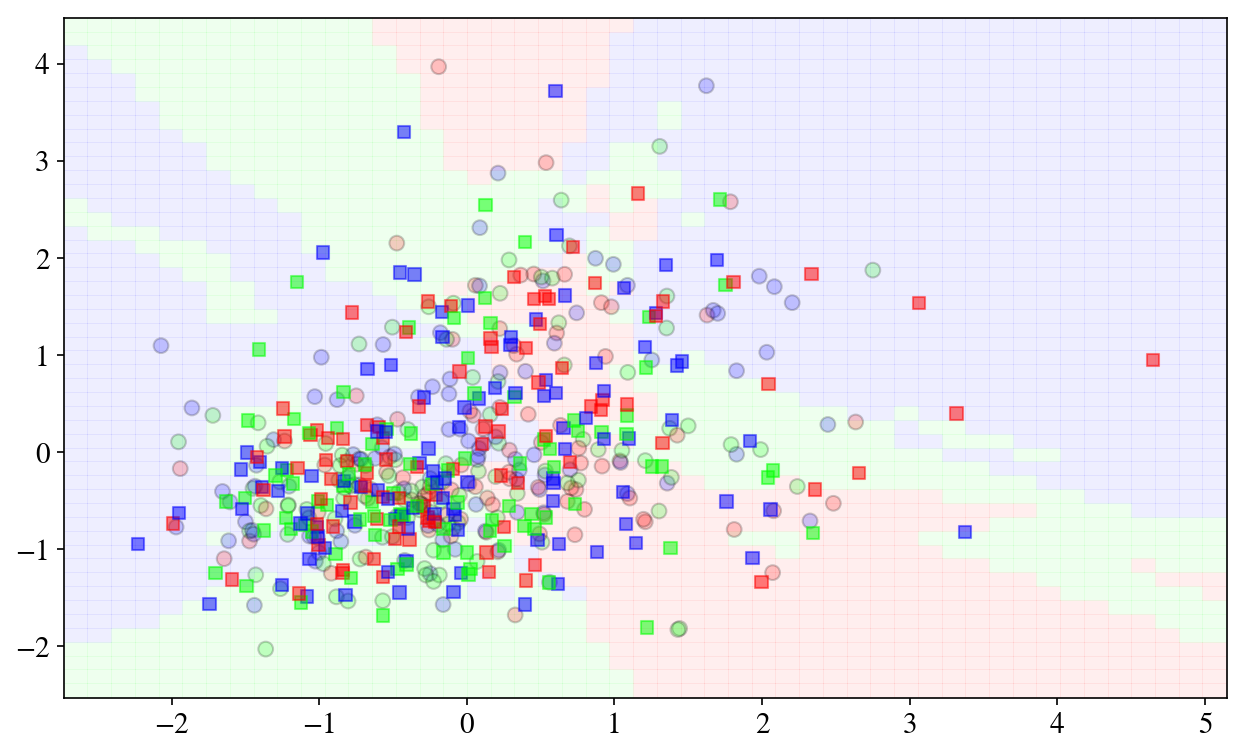

In [236]:
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, gs)